In [1]:
# from lxml import html
# tree = html.parse("report.html")
# print(html.tostring(tree))

In [1]:
file = open('files/2021_content.txt','r')
lines = file.readlines()
file.close

print(lines)


['\ufeffSection 1. Pandit Ramlall Way\n', 'Introduced by Council Member Adams\n', 'February 28, 1928 - January 16, 2019\n', '   Pandit Ramlall was a scholar, author, freedom fighter for Guyana’s independence and founder of the Annual Phagwah Parade held in Richmond Hill. He was the leader of the Arya Spiritual Center which educated youths regarding religion and culture. He received a plaque for his dedication to community involvement by the Guyana Cultural Association. Before he migrated to the United States in 1974, he was highly regarded in Guyana where he was born and raised. There, he served as a Member of Parliament advocating for the working class and at one point was jailed for nearly three years at Sibley Hall for his activism. In the United States, he studied psychology and received a diploma in Education. In 1975, he received the prestigious literary award at the first Vishwa Hindi Sammelan (World Hindi Conference) in Nagpur, India and also received numerous awards from Canad

In [2]:
# print([x.replace('\n', '').strip() for x in lines if x != '\n' or x != ''])

lines = [x.replace('\n', '').strip() for x in lines if x != '\n' or x != '']
new_lines = [x for x in lines if x != '']

print(len(lines))
print(len(new_lines))
print(new_lines)

447
352
['\ufeffSection 1. Pandit Ramlall Way', 'Introduced by Council Member Adams', 'February 28, 1928 - January 16, 2019', 'Pandit Ramlall was a scholar, author, freedom fighter for Guyana’s independence and founder of the Annual Phagwah Parade held in Richmond Hill. He was the leader of the Arya Spiritual Center which educated youths regarding religion and culture. He received a plaque for his dedication to community involvement by the Guyana Cultural Association. Before he migrated to the United States in 1974, he was highly regarded in Guyana where he was born and raised. There, he served as a Member of Parliament advocating for the working class and at one point was jailed for nearly three years at Sibley Hall for his activism. In the United States, he studied psychology and received a diploma in Education. In 1975, he received the prestigious literary award at the first Vishwa Hindi Sammelan (World Hindi Conference) in Nagpur, India and also received numerous awards from Canada

In [3]:
reason = []
coname = []

for i in range(len(new_lines)):
    if 'Section' in new_lines[i]:
        coname.append(new_lines[i].partition('.')[-1].strip())
        
        j = i+1
        while j-i<5 :
            
            if 'Section'in new_lines[j+1]:
                print(new_lines[j])
                reason.append(new_lines[j])
                break
                
            j += 1
        

Pandit Ramlall was a scholar, author, freedom fighter for Guyana’s independence and founder of the Annual Phagwah Parade held in Richmond Hill. He was the leader of the Arya Spiritual Center which educated youths regarding religion and culture. He received a plaque for his dedication to community involvement by the Guyana Cultural Association. Before he migrated to the United States in 1974, he was highly regarded in Guyana where he was born and raised. There, he served as a Member of Parliament advocating for the working class and at one point was jailed for nearly three years at Sibley Hall for his activism. In the United States, he studied psychology and received a diploma in Education. In 1975, he received the prestigious literary award at the first Vishwa Hindi Sammelan (World Hindi Conference) in Nagpur, India and also received numerous awards from Canada and the United States for his teachings and community work. In 2003, Queens Borough President Helen Marshall declared one day 

IndexError: list index out of range

In [4]:
print(len(coname))
print(len(reason))

92
91


In [5]:
reason.append('Luke N. Gasparre entered military service in 1944 and was deployed to France, where he served in the 87th Infantry Division. During that time he participated in securing the city of Metz, and fought in the Battle of the Bulge. For his service, he received seven medals, including the Purple Heart and the Bronze Star.  He was later awarded the French Legion of Honor as well. After the war, Gasparre returned to Astoria, where he started a family and took a job with the U.S. Postal Service. In 1964, he took a second job with the New York Mets at the recently-opened Shea Stadium and during his 55 years as an usher, witnessed two World Series victories, the legendary concert by the Beatles, and a visit from the Pope. Although he grew up a Yankees fan (and was once even quizzed on baseball and the Yankees to prove he was an American soldier), he became one of the most familiar, beloved faces at Shea Stadium and Citi Field.')

In [30]:
# #not useful 
# import pandas as pd 
# list_of_tuples = list(zip(coname, reason)) 

# df = pd.DataFrame(list_of_tuples,
#                   columns = ['CoName', 'Reason'])
# df

In [6]:
data = reason

In [7]:
import torch
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

embeddings = model.encode(data, show_progress_bar=True)

In [33]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=5, 
                            n_components=3, 
                            metric='cosine').fit_transform(embeddings)

In [34]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [35]:
umap_embeddings

array([[ 4.2056193 , -0.06664385,  7.493694  ],
       [ 4.8581457 ,  1.3856456 ,  7.1560416 ],
       [ 3.5901701 , -0.25813657,  8.61148   ],
       [ 5.64924   ,  1.5863042 ,  6.7964497 ],
       [ 5.2446647 ,  1.4344305 ,  7.0994415 ],
       [ 4.421403  , -0.6699435 ,  8.298235  ],
       [ 4.3926845 ,  3.9505842 ,  7.115206  ],
       [ 4.785418  ,  3.9786103 ,  6.356324  ],
       [ 3.8979142 ,  2.1837745 ,  9.439069  ],
       [ 5.3706694 ,  1.0205992 ,  8.281441  ],
       [ 4.006835  ,  3.8701532 ,  7.397596  ],
       [ 4.2833214 ,  2.4291244 ,  8.017881  ],
       [ 2.990798  ,  2.6046076 ,  8.10051   ],
       [ 5.6470037 ,  0.7427366 ,  6.638943  ],
       [ 3.6726878 ,  2.388288  ,  9.392972  ],
       [ 3.6965272 ,  3.6728475 ,  7.571295  ],
       [ 4.932208  ,  3.9291723 ,  6.2358904 ],
       [ 4.416701  ,  0.7019509 ,  6.662962  ],
       [ 5.0308943 ,  3.851     ,  6.1644063 ],
       [ 2.9269538 ,  2.3547757 ,  8.0663595 ],
       [ 6.278888  ,  0.04450139,  7.095

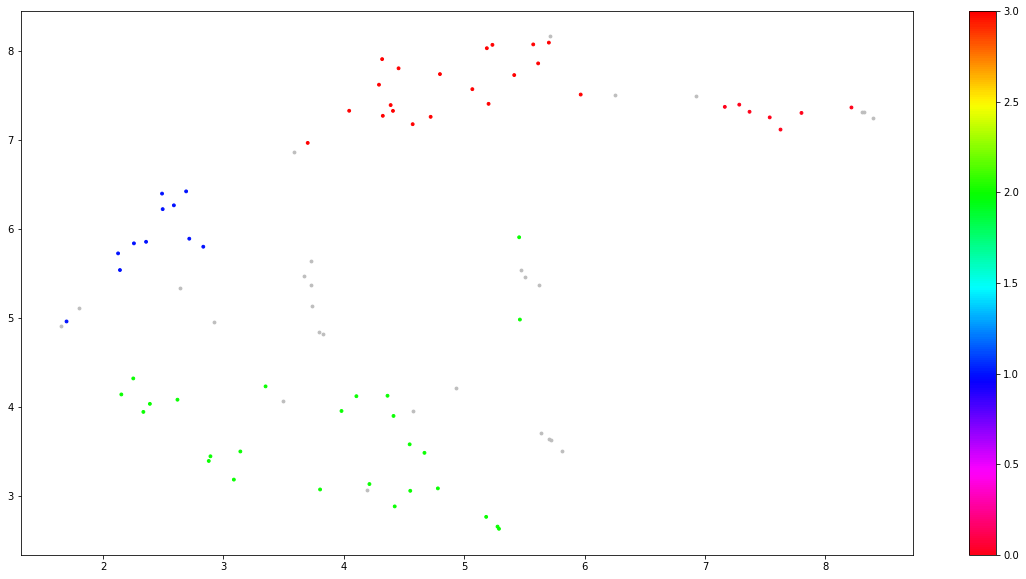

In [36]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=8)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=8, cmap='hsv_r')
plt.colorbar()

In [37]:
group = cluster.labels_
group

array([-1,  2,  1,  2,  2,  1,  0,  0,  3, -1,  0,  2,  3,  2,  3, -1, -1,
        2, -1,  3,  2, -1,  2, -1,  2,  1,  3,  3, -1,  2,  3,  2,  3, -1,
        2, -1,  0,  1,  3,  2,  0,  2,  0,  1,  2,  2, -1,  1,  1,  3,  3,
        3, -1,  2,  3,  3,  2,  2,  1,  2, -1,  2,  3,  2,  2,  3,  2,  2,
        3, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,  3,  1,  3,
       -1,  0, -1, -1,  2, -1, -1])

In [1]:
top = (40.86892-40.5409949)/4+40.86892
down = 40.5409949-(40.86892-40.5409949)/4
left = -74.2297827-(-73.72609609999999+74.2297827)/4
right = -73.72609609999999+(-73.72609609999999+74.2297827)/4

print(top,down,left,right)

40.95090127500001 40.459013625 -74.35570435 -73.60017445


In [10]:
import pickle
outfile = open('2021_reason.pkl','wb')
pickle.dump(reason,outfile)

outfile.close()

In [56]:
reason2 = reason
coname2 = coname

import pickle

file = open('2021_geocode.pkl','rb')

coname3 = pickle.load(file)
loc3 = pickle.load(file)
geo3 = pickle.load(file)

file.close()

In [57]:
#normalize geocode: bc of point? geo3/geo4 change simultaneously
i = 0
latlist = []
longlist = []

for geo in geo3:
    latlist.append(geo.latitude)
    longlist.append(geo.longitude)
    
minlat = min(latlist)
maxlat = max(latlist)
minlong = min(longlist)
maxlong = max(longlist)

print(minlat)
print(maxlat)
print(minlong)
print(maxlong)

40.5409949
40.86892
-74.2297827
-73.72609609999999


In [58]:
geo4 = geo3
geo = 0

for geo in geo4:
    geo.latitude = ((geo.latitude - minlat) / (maxlat - minlat)) * 50
    geo.longitude = ((geo.longitude - minlong) / (maxlong - minlong)) * 50
    
print(geo4)

[Point(22.879904587968326, 41.33407559383107, 0.0), Point(26.928085102360207, 43.01508120327214, 0.0), Point(21.757102460288213, 39.30941382994887, 0.0), Point(37.62671719853057, 28.026504973528475, 0.0), Point(41.509158646288284, 31.83480561126756, 0.0), Point(38.613985327746924, 27.658875578584087, 0.0), Point(39.1436032191504, 29.550240169184, 0.0), Point(19.598149089530782, 36.42500118128938, 0.0), Point(0.0, 8.21103837187659, 0.0), Point(3.6571308509168, 7.41416388683003, 0.0), Point(0.7591825084447451, 0.0, 0.0), Point(10.938488697571362, 21.647458955627823, 0.0), Point(49.05547028879434, 32.509093948499185, 0.0), Point(26.435503107264076, 22.762696089195455, 0.0), Point(48.075917336001126, 35.948861851793865, 0.0), Point(33.82595598811979, 29.363606258336073, 0.0), Point(21.336076439405673, 28.00394133971415, 0.0), Point(22.354372995541002, 25.618092679058435, 0.0), Point(24.457185497541307, 24.51241506127004, 0.0), Point(21.598163727021074, 25.25053277176778, 0.0), Point(21.584

In [59]:
i = 0
latlist = []
longlist = []

for geo in geo4:
    latlist.append(geo.latitude)
    longlist.append(geo.longitude)
    
minlat = min(latlist)
maxlat = max(latlist)
minlong = min(longlist)
maxlong = max(longlist)

print(minlat)
print(maxlat)
print(minlong)
print(maxlong)

0.0
50.0
0.0
50.0


In [61]:
## creating dictionary

i = 0
dictlist = []
thisdict = {}


for i in range(len(coname2)):
    thisdict = {
      "id":'2020'+str(i),
      "coname": coname2[i],
      "reason": reason2[i],
      "year": 2020,
      "group": int(group[i]),
      "location":loc3[i],
      "lat":geo3[i].latitude,
      "long":geo3[i].longitude,
      "nlat":geo4[i].latitude,
      "nlong":geo4[i].longitude
    }
    
    dictlist.append(thisdict)



In [63]:
type(geo4[i].longitude)

float

In [64]:
import json

# y = json.dumps(dictlist)

# outfile = open("my2020v2.json", "w")
  
json.dump(dictlist, outfile, indent = 2)
  
outfile.close()

# for d in dictlist:
#     djson = json.dumps(d)

In [ ]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [ ]:
docs_per_topic

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [ ]:
len(tf_idf)

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

In [ ]:
top_n_words[3]

In [ ]:
top_n_words[2]

In [ ]:
top_n_words[0][:10]

In [ ]:
top_n_words[1][:10]

In [ ]:
top_n_words[-1][:10]

In [ ]:
from wordcloud import WordCloud

def draw_word_cloud(num):
    
    aa = pd.DataFrame(top_n_words[num], columns=['word', 'freq'])
    aa.index = aa.word
    bb = aa.drop(columns=['word'])
    bb['freq'].astype(float)

    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(bb['freq'])
    plt.imshow(wordcloud)
    plt.savefig('img'+str(num)+'.png')

In [ ]:
draw_word_cloud(1)

In [ ]:
draw_word_cloud(2)

In [ ]:
draw_word_cloud(3)

In [ ]:
draw_word_cloud(0)

In [ ]:
draw_word_cloud(-1)